In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [6]:
mnist = datasets.fetch_openml(name = 'mnist_784',
                              version = 1,
                              return_X_y =True
)

In [75]:
pixels,target = mnist
print(pixels,type(pixels))
print(target,type(target))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] <class 'numpy.ndarray'>
['5' '0' '4' ... '4' '5' '6'] <class 'numpy.ndarray'>


'4'

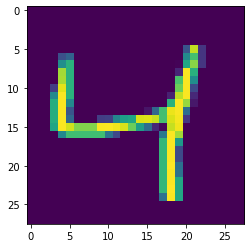

In [16]:
single_image = pixels[2,:].reshape(28,28)
plt.imshow(single_image)
target[2]

In [24]:
no_of_images = 3000
X = pixels[:no_of_images,:]
y = target[:no_of_images]
print(X.shape)
print(y.shape)

(3000, 784)
(3000,)


In [25]:
tsne = TSNE(n_components = 2, random_state = 42)
transformed_data = tsne.fit_transform(X)
transformed_data

array([[ -5.281551 , -28.952768 ],
       [-26.105896 , -68.06932  ],
       [-42.503582 ,  35.58039  ],
       ...,
       [ 13.466378 ,  47.369007 ],
       [ -2.4357524,   7.983772 ],
       [ -4.2482643, -13.26691  ]], dtype=float32)

In [45]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data,y)),columns=["x","y","targets"])
tsne_df.head()

,x,y,targets
0,-5.28155,-28.9528,5
1,-26.1059,-68.0693,0
2,-42.5036,35.5804,4
3,38.894,26.6634,1
4,-14.7706,35.4332,9


In [46]:
tsne_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   x        3000 non-null   object
 1   y        3000 non-null   object
 2   targets  3000 non-null   object
dtypes: object(3)
memory usage: 70.4+ KB


In [56]:
tsne_df.loc[:,"targets"] = tsne_df.targets.astype('int')
tsne_df.targets.unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8])

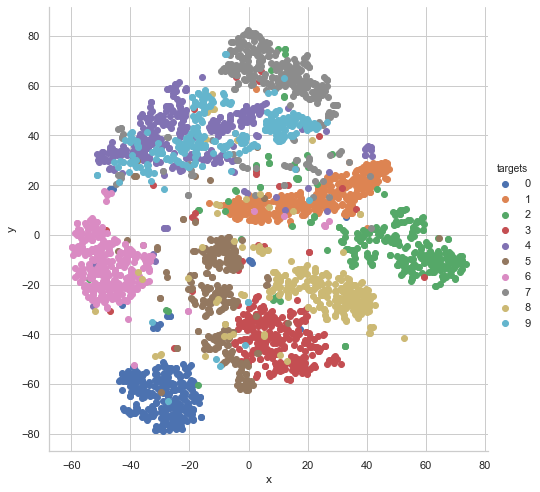

In [74]:
sns.set(style='whitegrid')
grid = sns.FacetGrid(tsne_df,hue = "targets",height = 7)
grid.map(plt.scatter, "x", "y").add_legend()